In [1]:
3+4

7

In [1]:
print('sfjhsd')

sfjhsd


In [2]:
words = open('first_name.txt','r').read().splitlines()

In [3]:
dictv = {}
for w in words:
    w =w.lower()
    chars = ['<s>']+list(w)+['<e>']
    for ch1,ch2 in zip(chars,chars[1:]):
        bigram = (ch1,ch2)
        dictv[bigram] = dictv.get(bigram,0)+1

In [4]:
sorted(dictv.items(),key = lambda k: -k[1])

[(('a', '<e>'), 621),
 (('a', 'n'), 599),
 (('s', 'h'), 550),
 (('h', 'a'), 439),
 (('r', 'a'), 353),
 (('i', '<e>'), 344),
 (('<s>', 's'), 342),
 (('a', 'r'), 315),
 (('<s>', 'a'), 311),
 (('h', 'i'), 246),
 (('n', '<e>'), 233),
 (('y', 'a'), 229),
 (('k', 'a'), 210),
 (('n', 'a'), 207),
 (('m', 'a'), 199),
 (('h', '<e>'), 195),
 (('n', 'i'), 188),
 (('i', 't'), 176),
 (('r', 'i'), 174),
 (('a', 's'), 173),
 (('e', 'e'), 167),
 (('a', 'l'), 162),
 (('a', 'm'), 145),
 (('t', 'a'), 141),
 (('i', 'n'), 140),
 (('t', '<e>'), 140),
 (('v', 'i'), 136),
 (('<s>', 'm'), 136),
 (('<s>', 'p'), 132),
 (('s', 'a'), 127),
 (('<s>', 'k'), 126),
 (('i', 's'), 124),
 (('<s>', 'r'), 124),
 (('i', 'k'), 122),
 (('j', 'a'), 120),
 (('v', 'a'), 119),
 (('t', 'h'), 117),
 (('a', 't'), 112),
 (('<s>', 'n'), 111),
 (('l', '<e>'), 110),
 (('p', 'r'), 106),
 (('<s>', 'd'), 106),
 (('a', 'v'), 105),
 (('r', '<e>'), 102),
 (('<s>', 'v'), 101),
 (('l', 'a'), 100),
 (('a', 'k'), 99),
 (('t', 'i'), 96),
 (('n', 'd

In [5]:
import torch

In [6]:
words = [w.lower() for w in words]

In [7]:
chars = sorted(list(set(''.join(words))))
print(len(chars))

26


In [8]:
stoi = {s:i for i,s in enumerate (chars)}

In [9]:
stoi['<s>'] = 26
stoi['<e>'] = 27

In [10]:
N = torch.zeros((28,28),dtype = torch.int32)

In [11]:
for w in words:
    chars = ['<s>']+list(w)+['<e>']
    for ch1,ch2 in zip(chars,chars[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2]+=1

In [12]:
N.shape

torch.Size([28, 28])

In [13]:
itos = {i:s for s,i in stoi.items()}

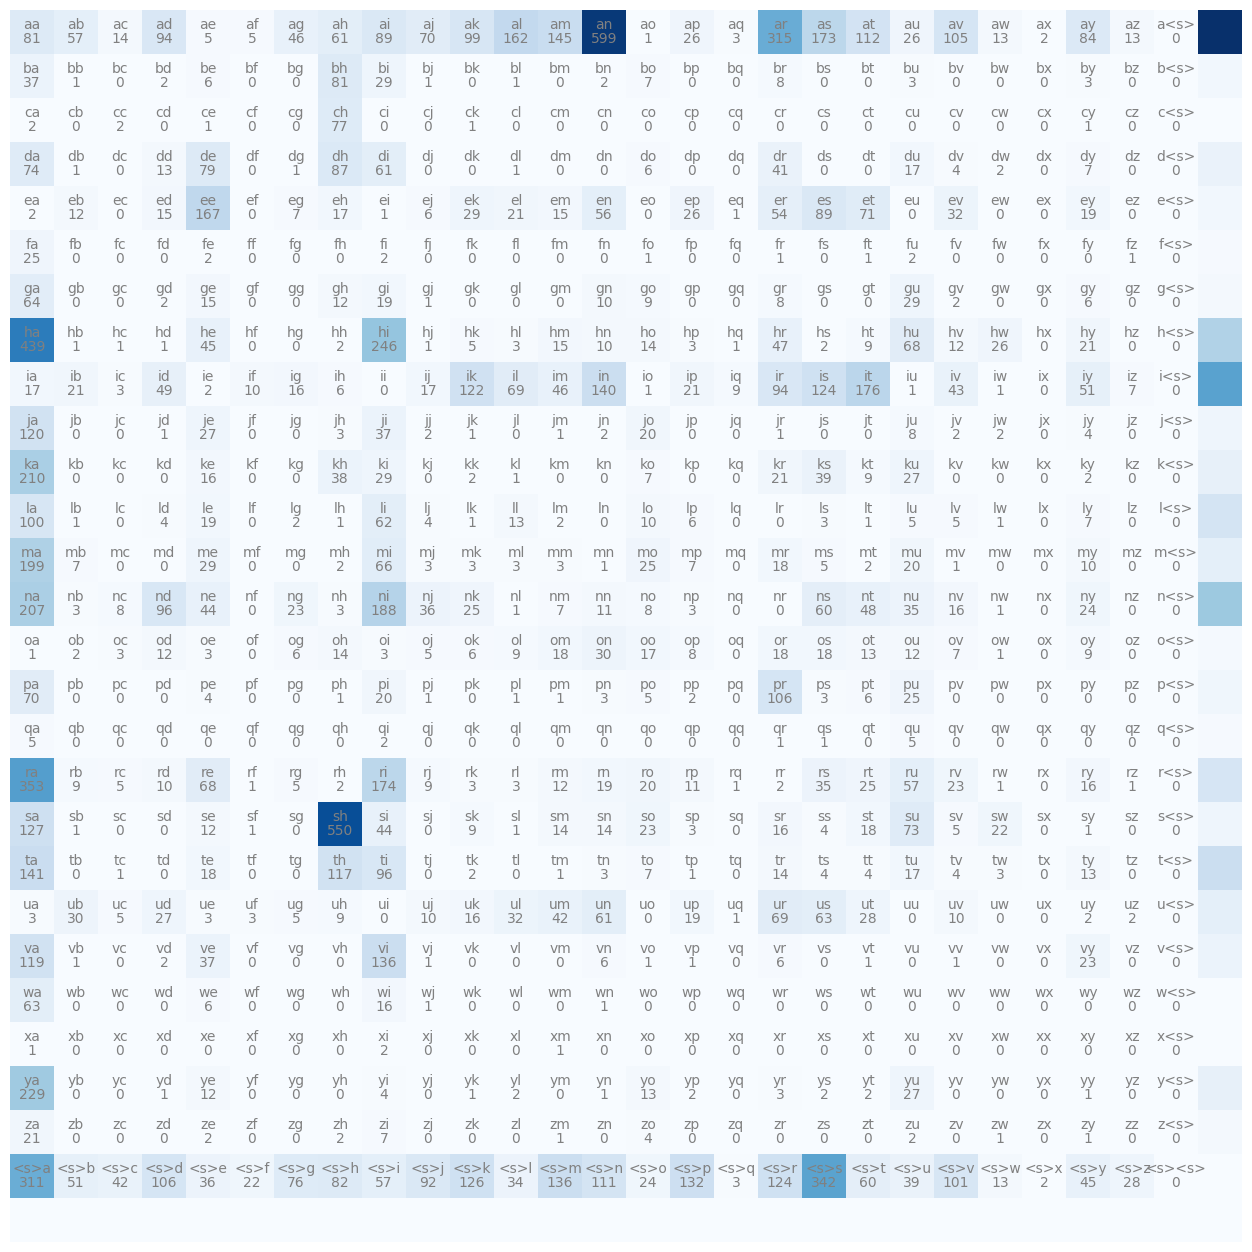

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [16]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [17]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

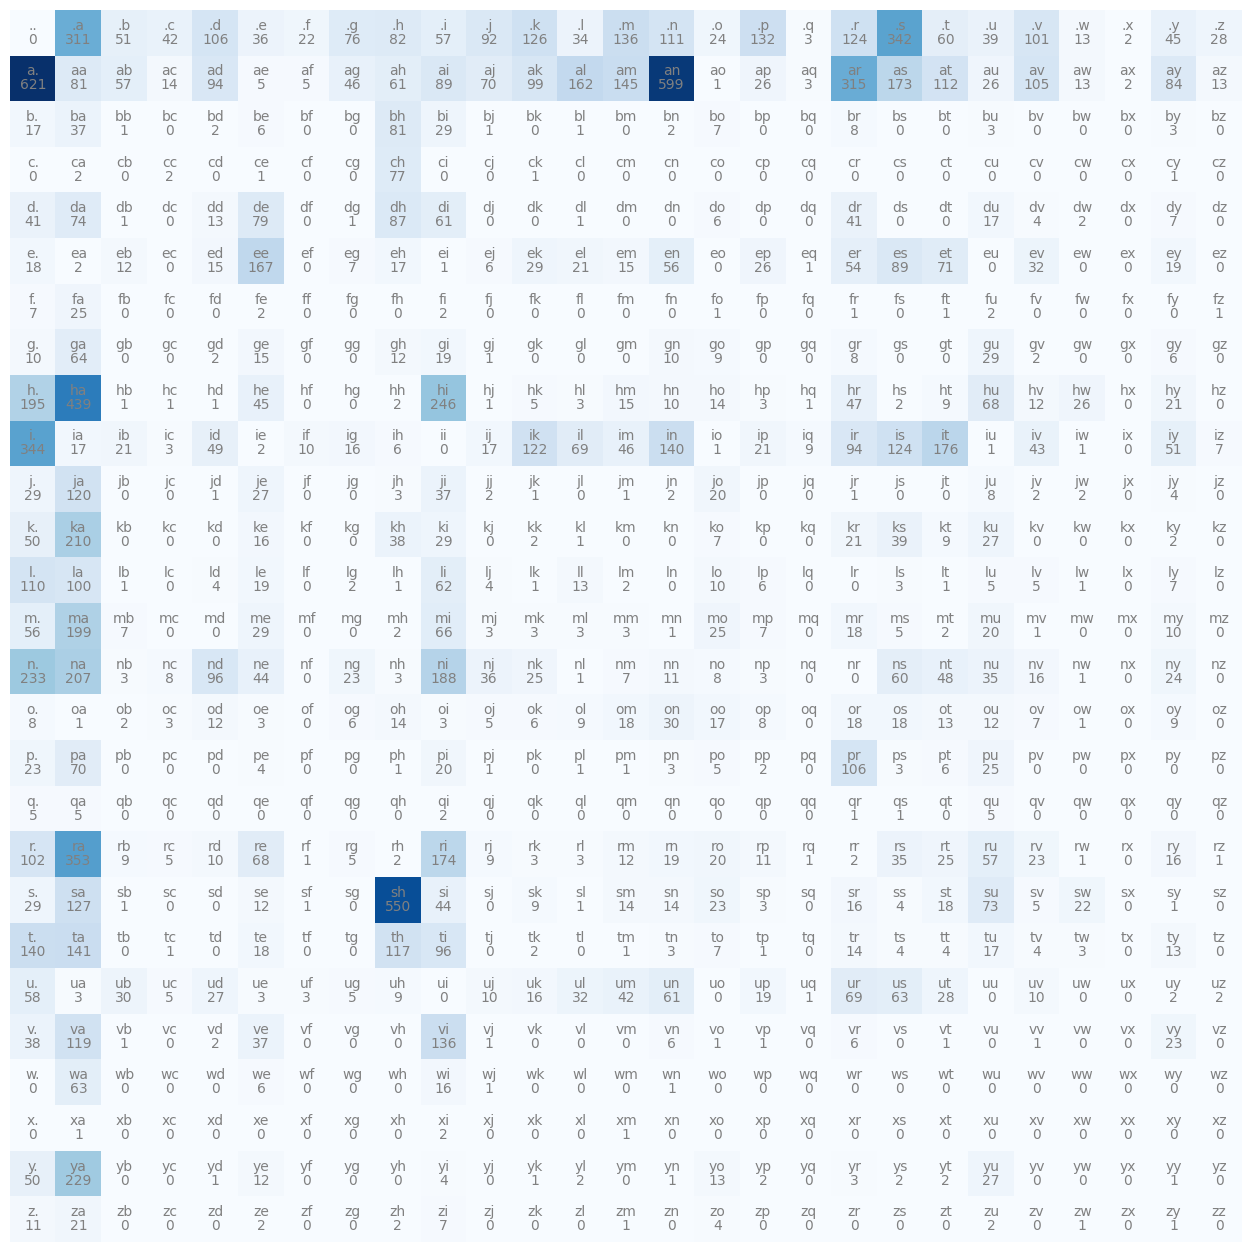

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [19]:
N[0] # is the number of times . is followed by .,a,b,c,d,e etc

tensor([  0, 311,  51,  42, 106,  36,  22,  76,  82,  57,  92, 126,  34, 136,
        111,  24, 132,   3, 124, 342,  60,  39, 101,  13,   2,  45,  28],
       dtype=torch.int32)

In [20]:
# normalize the N
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1417, 0.0232, 0.0191, 0.0483, 0.0164, 0.0100, 0.0346, 0.0374,
        0.0260, 0.0419, 0.0574, 0.0155, 0.0620, 0.0506, 0.0109, 0.0601, 0.0014,
        0.0565, 0.1558, 0.0273, 0.0178, 0.0460, 0.0059, 0.0009, 0.0205, 0.0128])

In [21]:
p.sum()

tensor(1.)

In [25]:
g = torch.Generator().manual_seed(2147)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

's'

In [28]:
g = torch.Generator().manual_seed(2147)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.1634, 0.4235, 0.4131])

In [32]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2,
        2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2,
        1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2,
        1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 1, 2])

In [34]:
P = (N+1).float()
P /= P.sum(1, keepdims=True) # this is important and you should respect this code on why keepsdim is true
# read more about broadcasting in pytorch tensors

In [37]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

deeba.
pral.
urari.
zitaharvinimititinjakavi.
ka.


In [38]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [39]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood # negative log likelihood
print(f'{nll=}')
print(f'{nll/n}') # average log likelihood

log_likelihood=tensor(-37505.1953)
nll=tensor(37505.1953)
2.289414882659912


## doing the same above thing but using neural network this time

In [43]:
# create the training set
xs ,ys = [],[]
for w in words[:1]:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1,ch2)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a c
c h
h a
a l
l .


In [44]:
print(xs)
print(ys)

tensor([ 0,  1,  1,  3,  8,  1, 12])
tensor([ 1,  1,  3,  8,  1, 12,  0])


In [46]:
# these are our training examples like 0 should be followed by 1 1 shpuld be followed by 1 then by 3 then 3 should be followed by 8  and so on

In [47]:
xs.dtype

torch.int64

In [53]:
# we will use one hot encoding
import torch.nn.functional as f
x_encoded = f.one_hot(xs,num_classes=27).float()

In [54]:
x_encoded

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
x_encoded.shape # these can be considered as 7 training examples with 27 inputs in each example

torch.Size([7, 27])

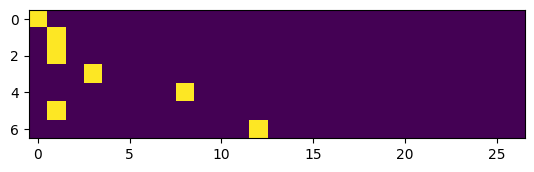

In [56]:
plt.imshow(x_encoded)

In [57]:
x_encoded.dtype

torch.float32

In [58]:
w = torch.rand(27,1) # here 1 is the number of neurons
w

tensor([[0.4676],
        [0.5052],
        [0.4093],
        [0.2643],
        [0.8190],
        [0.2523],
        [0.1791],
        [0.3511],
        [0.5972],
        [0.8602],
        [0.6366],
        [0.7368],
        [0.5095],
        [0.2851],
        [0.1706],
        [0.9725],
        [0.2804],
        [0.5195],
        [0.6262],
        [0.7813],
        [0.5582],
        [0.8131],
        [0.3576],
        [0.6398],
        [0.3015],
        [0.8974],
        [0.7733]])

In [63]:
out = x_encoded[0]@w # this is like feeding out first single training example into a single neuron
print(out)

tensor([0.4676])


In [64]:
(x_encoded @w) #this can be considered as the output of the 7 exampples fed into a single neuron
# these are the activation of a single neuron with 7 different examples

tensor([[0.4676],
        [0.5052],
        [0.5052],
        [0.2643],
        [0.5972],
        [0.5052],
        [0.5095]])

In [66]:
w = torch.rand(27,27)
out = x_encoded@w

In [67]:
out.shape

torch.Size([7, 27])

In [70]:
out

tensor([[0.0098, 0.2206, 0.6360, 0.1844, 0.3828, 0.6480, 0.4222, 0.8277, 0.4079,
         0.2143, 0.6237, 0.5619, 0.2183, 0.7193, 0.6756, 0.1724, 0.5389, 0.1758,
         0.9692, 0.9351, 0.5605, 0.7337, 0.8126, 0.8526, 0.3267, 0.2945, 0.7839],
        [0.0221, 0.8697, 0.9780, 0.6247, 0.9659, 0.6034, 0.0222, 0.8828, 0.3655,
         0.0192, 0.4314, 0.4571, 0.8736, 0.0557, 0.0263, 0.5309, 0.2505, 0.5942,
         0.2424, 0.5213, 0.4566, 0.8126, 0.2430, 0.9860, 0.1660, 0.5310, 0.8344],
        [0.0221, 0.8697, 0.9780, 0.6247, 0.9659, 0.6034, 0.0222, 0.8828, 0.3655,
         0.0192, 0.4314, 0.4571, 0.8736, 0.0557, 0.0263, 0.5309, 0.2505, 0.5942,
         0.2424, 0.5213, 0.4566, 0.8126, 0.2430, 0.9860, 0.1660, 0.5310, 0.8344],
        [0.5606, 0.9665, 0.7246, 0.7450, 0.2800, 0.9156, 0.5680, 0.4402, 0.2889,
         0.1402, 0.8475, 0.6655, 0.7826, 0.1085, 0.4640, 0.3021, 0.4399, 0.5388,
         0.8037, 0.8753, 0.9471, 0.6648, 0.9574, 0.9749, 0.2571, 0.5854, 0.9603],
        [0.7746, 0.4573,

In [77]:
out[3][12] # this show the actiavation of the 4th neuron on the 13th training input

tensor(0.7826)

In [79]:
x_encoded[3]

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
w[:,12]

tensor([0.2183, 0.8736, 0.0750, 0.7826, 0.1276, 0.3081, 0.1989, 0.1654, 0.9473,
        0.1096, 0.5776, 0.2524, 0.3310, 0.4183, 0.2191, 0.7316, 0.7749, 0.4426,
        0.5803, 0.8783, 0.7391, 0.8090, 0.2332, 0.2947, 0.2466, 0.4725, 0.8073])

In [82]:
(x_encoded[3]*w[:,12]).sum()

tensor(0.7826)

In [83]:
logits = x_encoded@w
counts = logits.exp() # equivalent to N matrix
probs = counts/counts.sum(1,keepdim= True)
probs# this is softmax function to convert the output of the neuron into a probability

tensor([[0.0216, 0.0266, 0.0404, 0.0257, 0.0313, 0.0409, 0.0326, 0.0489, 0.0321,
         0.0265, 0.0399, 0.0375, 0.0266, 0.0439, 0.0420, 0.0254, 0.0366, 0.0255,
         0.0563, 0.0544, 0.0374, 0.0445, 0.0482, 0.0501, 0.0296, 0.0287, 0.0468],
        [0.0219, 0.0512, 0.0570, 0.0401, 0.0564, 0.0392, 0.0219, 0.0519, 0.0309,
         0.0219, 0.0330, 0.0339, 0.0514, 0.0227, 0.0220, 0.0365, 0.0276, 0.0389,
         0.0273, 0.0361, 0.0339, 0.0483, 0.0274, 0.0575, 0.0253, 0.0365, 0.0494],
        [0.0219, 0.0512, 0.0570, 0.0401, 0.0564, 0.0392, 0.0219, 0.0519, 0.0309,
         0.0219, 0.0330, 0.0339, 0.0514, 0.0227, 0.0220, 0.0365, 0.0276, 0.0389,
         0.0273, 0.0361, 0.0339, 0.0483, 0.0274, 0.0575, 0.0253, 0.0365, 0.0494],
        [0.0336, 0.0505, 0.0396, 0.0404, 0.0254, 0.0480, 0.0339, 0.0298, 0.0256,
         0.0221, 0.0448, 0.0374, 0.0420, 0.0214, 0.0305, 0.0260, 0.0298, 0.0329,
         0.0429, 0.0461, 0.0495, 0.0373, 0.0500, 0.0509, 0.0248, 0.0345, 0.0502],
        [0.0470, 0.0342,

In [84]:
probs[0].sum()

tensor(1.0000)

In [85]:
probs.shape

torch.Size([7, 27])

In [87]:
probs[0].shape

torch.Size([27])

In [88]:
probs[0]

tensor([0.0216, 0.0266, 0.0404, 0.0257, 0.0313, 0.0409, 0.0326, 0.0489, 0.0321,
        0.0265, 0.0399, 0.0375, 0.0266, 0.0439, 0.0420, 0.0254, 0.0366, 0.0255,
        0.0563, 0.0544, 0.0374, 0.0445, 0.0482, 0.0501, 0.0296, 0.0287, 0.0468])

##Summary

In [89]:
xs # input to our network

tensor([ 0,  1,  1,  3,  8,  1, 12])

In [90]:
ys # expected output 0 should be followed by 1 1 by 1 1 by 3 3 by 8

tensor([ 1,  1,  3,  8,  1, 12,  0])

In [107]:
g = torch.Generator().manual_seed(2147)
w = torch.rand((27, 27), generator=g, requires_grad=True)

So we feed 7 examples to our network first we one hot encod the input then calculate the logits and convert them to probabilities hence we get 7*27 27 probabilities for each of the input example

In [98]:
xenc = f.one_hot(xs,num_classes = 27).float()
logits = xenc@w
counts = logits.exp() # similar to N
prob = counts/counts.sum(1,keepdim = True)
prob

tensor([[0.0272, 0.0398, 0.0392, 0.0477, 0.0513, 0.0316, 0.0257, 0.0558, 0.0278,
         0.0230, 0.0325, 0.0350, 0.0224, 0.0410, 0.0425, 0.0313, 0.0578, 0.0269,
         0.0470, 0.0305, 0.0478, 0.0281, 0.0314, 0.0313, 0.0342, 0.0509, 0.0404],
        [0.0429, 0.0543, 0.0330, 0.0383, 0.0291, 0.0525, 0.0404, 0.0310, 0.0259,
         0.0566, 0.0237, 0.0510, 0.0350, 0.0453, 0.0438, 0.0234, 0.0345, 0.0376,
         0.0264, 0.0423, 0.0379, 0.0524, 0.0254, 0.0238, 0.0316, 0.0406, 0.0213],
        [0.0429, 0.0543, 0.0330, 0.0383, 0.0291, 0.0525, 0.0404, 0.0310, 0.0259,
         0.0566, 0.0237, 0.0510, 0.0350, 0.0453, 0.0438, 0.0234, 0.0345, 0.0376,
         0.0264, 0.0423, 0.0379, 0.0524, 0.0254, 0.0238, 0.0316, 0.0406, 0.0213],
        [0.0501, 0.0510, 0.0333, 0.0410, 0.0480, 0.0436, 0.0441, 0.0332, 0.0231,
         0.0305, 0.0469, 0.0341, 0.0452, 0.0313, 0.0266, 0.0235, 0.0251, 0.0455,
         0.0380, 0.0469, 0.0319, 0.0356, 0.0382, 0.0331, 0.0238, 0.0493, 0.0272],
        [0.0485, 0.0450,

In [99]:
prob.shape

torch.Size([7, 27])

In [100]:

nlls = torch.zeros(7)
for i in range(7):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0216, 0.0266, 0.0404, 0.0257, 0.0313, 0.0409, 0.0326, 0.0489, 0.0321,
        0.0265, 0.0399, 0.0375, 0.0266, 0.0439, 0.0420, 0.0254, 0.0366, 0.0255,
        0.0563, 0.0544, 0.0374, 0.0445, 0.0482, 0.0501, 0.0296, 0.0287, 0.0468])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.02664368413388729
log likelihood: -3.6252031326293945
negative log likelihood: 3.6252031326293945
--------
bigram example 2: aa (indexes 1,1)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0219, 0.0512, 0.0570, 0.0401, 0.0564, 0.0392, 0.0219, 0.0519, 0.0309,
        0.0219, 0.0330, 0.0339, 0.0514, 0.0227, 0.0220, 0.0365, 0.0276, 0.0389,
        0.0273, 0.0361, 0.0339, 0.0483, 0.0274, 0.0575, 0.0253, 0.0365, 0.0494])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.

In [101]:
# we can use gradient descent now as Loss is now a function of w and
# loss is differentiable operation so we can minise the loss by tuning w
# by computing gradient of loss wrt w using backpropagation

In [122]:

# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
w= torch.randn((27, 27), generator=g, requires_grad=True)

In [123]:
print(w.grad)

None


In [124]:
# forward pass
xenc = f.one_hot(xs,num_classes = 27).float()
logits = xenc@w
counts = logits.exp()
prob = counts/counts.sum(1,keepdim = True)
pr= prob[torch.arange(7),ys] # probbaility assgned by network to correct answer
loss = -pr.log().mean()

In [125]:
# backward pass
w.grad = None
loss.backward()


In [104]:
loss

tensor(3.2989)

In [126]:
w.grad

tensor([[ 0.0087, -0.1414,  0.0018,  0.0006,  0.0024,  0.0018,  0.0004,  0.0033,
          0.0020,  0.0045,  0.0011,  0.0040,  0.0013,  0.0012,  0.0071,  0.0340,
          0.0086,  0.0004,  0.0036,  0.0008,  0.0048,  0.0016,  0.0004,  0.0028,
          0.0017,  0.0220,  0.0208],
        [ 0.0064, -0.1392,  0.0170, -0.1386,  0.0260,  0.0132,  0.0465,  0.0056,
          0.0054,  0.0021,  0.0439,  0.0037, -0.1005,  0.0048,  0.0099,  0.0089,
          0.0175,  0.0033,  0.0385,  0.0228,  0.0198,  0.0132,  0.0022,  0.0141,
          0.0280,  0.0216,  0.0039],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0179,  0.0039,  0.0013,  0.0190,  0.0071,  0.0145,  0.0022,  0.0015,
         -0.1297,  0.0014,  0.0059,  0.0061,  0.0011,  0.0025,  0.0162,  0.0021

In [128]:
# now nudge the w accoring to the gradient
w.data +=-0.1*w.grad

In [144]:

# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147)
w = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  16382


In [145]:
k_values ,loss_values = [],[]
# gradient descent
for k in range(20):

  # forward pass
  xenc = f.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ w # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(w**2).mean() # this is for smoothing and regularization


  # backward pass
  w.grad = None # set to zero the gradient
  loss.backward()

  # update
  w.data += -30* w.grad
  print(k,loss.item())
  k_values.append(k)
  loss_values.append(loss.item())


0 3.93355655670166
1 3.57883882522583
2 3.314927101135254
3 3.1273508071899414
4 2.994905710220337
5 2.9003219604492188
6 2.83048415184021
7 2.7755661010742188
8 2.730347156524658
9 2.6922268867492676
10 2.6596553325653076
11 2.631542444229126
12 2.6070687770843506
13 2.5856001377105713
14 2.566641330718994
15 2.5497970581054688
16 2.534749984741211
17 2.5212390422821045
18 2.5090489387512207
19 2.4979989528656006


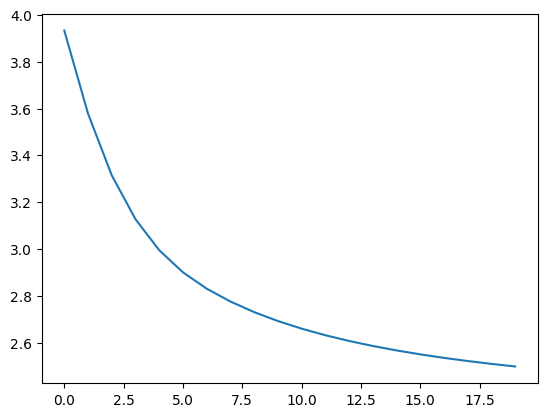

In [146]:
plt.plot(k_values,loss_values)

In [154]:

# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(214)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = f.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ w # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

sharikk.
aoon.
mrarah.
x.
jarmurshligexrvjlienafabta.
